In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
offer_info = pd.read_csv('offer_info.csv', index_col = 'offer_id')
dict_names = offer_info.to_dict()['varietal']
dict_names = {str(i):dict_names[i] for i in dict_names}

customer_offers = pd.read_csv('customer_offers.csv', index_col = 'customer_name')
customer_offers = customer_offers.rename(columns = dict_names)
customer_offers_fit = customer_offers.copy()

In [ ]:
from sklearn.cluster import MeanShift
from sklearn import cluster

x = customer_offers_fit
bandwidth = cluster.estimate_bandwidth(x, quantile = 0.1)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(x)
customer_offers['Cluster_MeanShift'] = ms.labels_
print(f'Numero de Cluster_MeanShift: {len(customer_offers.Cluster_MeanShift.unique())}')

Numero de Cluster_MeanShift: 4


In [ ]:
from kmodes.kprototypes import KPrototypes

x = customer_offers_fit.values
kp = KPrototypes(n_clusters=4)
customer_offers['Cluster_KPrototypes'] = kp.fit_predict(x, categorical = [1])
print(f'Numero de Cluster_KPrototypes: {len(customer_offers.Cluster_KPrototypes.unique())}')

Numero de Cluster_KPrototypes: 4


In [ ]:
from sklearn.cluster import KMeans

model = KMeans( n_clusters = 4,
                random_state = 100) 
names_columns = list(customer_offers_fit.columns)
model.fit(customer_offers_fit[names_columns])
customer_offers['Cluster_KMeans'] = model.labels_
print(f'Numero de Cluster_KMeans: {len(customer_offers.Cluster_KMeans.unique())}')

Numero de Cluster_KMeans: 4


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
names_columns = list(customer_offers_fit.columns)
customer_offers['PC1'], customer_offers['PC2'] = zip(* pca.fit_transform(customer_offers[names_columns]))

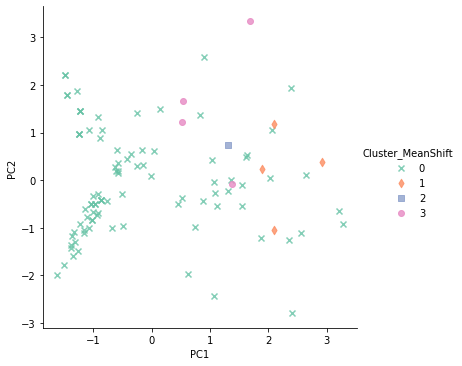

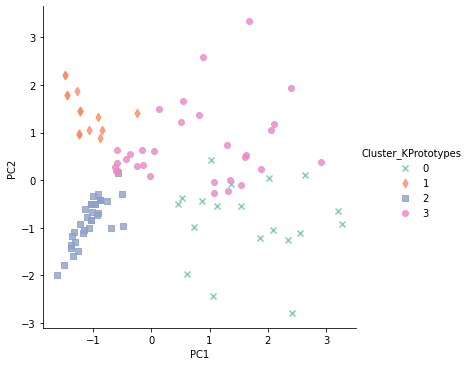

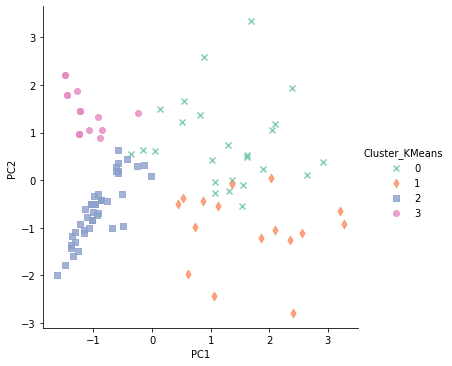

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for cluster in ['Cluster_MeanShift', 'Cluster_KPrototypes', 'Cluster_KMeans']:
    sns.lmplot( x = 'PC1',
                y = 'PC2',
                data = customer_offers,
                hue = cluster,
                markers = ['x','d','s','o'],
                fit_reg = False,
                palette="Set2")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=11bf7be5-3b62-4605-8e79-42e562c1fd79' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>